In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [146]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'

In [147]:
files_E = glob.glob(f"{data_folder}\\EP\\combined_PE_GLEAM.parquet")
files_E

['C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1502\\Git\\ENVM1502-Catchment-model\\Data\\EP\\combined_PE_GLEAM.parquet']

In [148]:
evap = pd.read_parquet(files_E).sort_index()
evap.index = pd.to_datetime(evap.index)
evap.rename(columns={"Pe":"Pev"},inplace=True)
evap.head()

,Pev
time,
1980-01-01,0.212411
1980-01-02,0.167835
1980-01-03,0.235660
1980-01-04,0.167202
1980-01-05,0.192151


In [149]:
# take the theissen weighted amounts
files_P = glob.glob(f"{data_folder}\\P\\weighted*.parquet")
print(files_P)

prcp = pd.read_parquet(files_P[0])
prcp.head()

['C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1502\\Git\\ENVM1502-Catchment-model\\Data\\P\\weighted_average_P.parquet']


,P
index,
1950-01-01,0.019288
1950-01-02,0.465449
1950-01-03,3.213094
1950-01-04,3.390378
1950-01-05,1.133890


Issue with data around 2000

['C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1502\\Git\\ENVM1502-Catchment-model\\Data\\Q\\1358000.parquet']


<AxesSubplot: xlabel='date'>

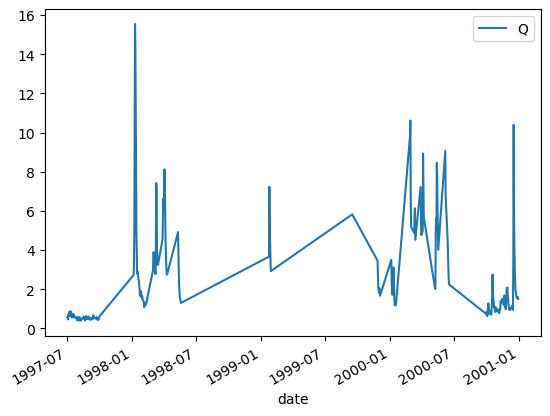

In [150]:
files_Q = glob.glob(f"{data_folder}\\Q\\1358000.parquet")
print(files_Q)

discharge = pd.read_parquet(files_Q[0],columns=['date','Q_mm_d_hydro'],engine="pyarrow")
discharge.index = pd.to_datetime(discharge['date'])

# df['date'] = df.apply(lambda x: str(x.name), axis=1)
discharge.rename(columns={'Q_mm_d_hydro':'Q'}, inplace=True)
discharge.loc["1997-07":"2000"].plot()

In [151]:
file_T = f'{data_folder}\\T\\combined_mean_T.parquet'
temperature = pd.read_parquet(file_T)
temperature.rename(columns={'T_MEAN':'T'}, inplace=True)
temperature.head()

,T
DATE,
1885-01-01,3.85
1885-01-02,-10.30
1885-01-03,-11.40
1885-01-04,-8.05
1885-01-05,-2.80


In [152]:
df = pd.concat([temperature,evap,prcp, discharge], axis=1)
df.head()

,T,Pev,P,date,Q
1885-01-01,3.85,NaN,NaN,NaN,NaN
1885-01-02,-10.30,NaN,NaN,NaN,NaN
1885-01-03,-11.40,NaN,NaN,NaN,NaN
1885-01-04,-8.05,NaN,NaN,NaN,NaN
1885-01-05,-2.80,NaN,NaN,NaN,NaN


Some missing data in the discharge

<AxesSubplot: >

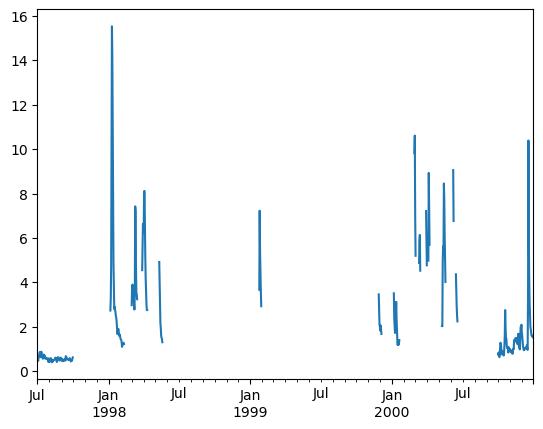

In [153]:
df["Q"].loc["1997-07":"2000"].plot()

 Instead opt for adding two gauges together: 01357500 & 01335754 <img src="Figures\river_split.png" alt="Alternative text" width=300 align="left"/>

In [164]:
df_combined_E_W_path = glob.glob(f"{data_folder}\\Q\\combining_1357500_1335754.parquet")

df_combined_E_W = pd.read_parquet(df_combined_E_W_path[0], columns=['Q_m3_s_mean','date'])
df_combined_E_W.index = pd.to_datetime(df_combined_E_W.date)
df_combined_E_W.rename(columns={'Q_m3_s_mean':'Q'}, inplace=True)

In [165]:
# discharge_Q_East = pd.read_parquet(files_Q_East[0], columns=['Q_mm_d_hydro','date'])
# discharge_Q_East.index = pd.to_datetime(discharge_Q_East.date)
# discharge_Q_East.rename(columns={'Q_mm_d_hydro':'Q'}, inplace=True)

# discharge_Q_West = pd.read_parquet(files_Q_West[0], columns=['Q_mm_d_hydro','date'])
# discharge_Q_West.index = pd.to_datetime(discharge_Q_West.date)
# discharge_Q_West.rename(columns={'Q_mm_d_hydro':'Q'}, inplace=True)

Text(0.5, 1.0, 'comparing the two gauges')

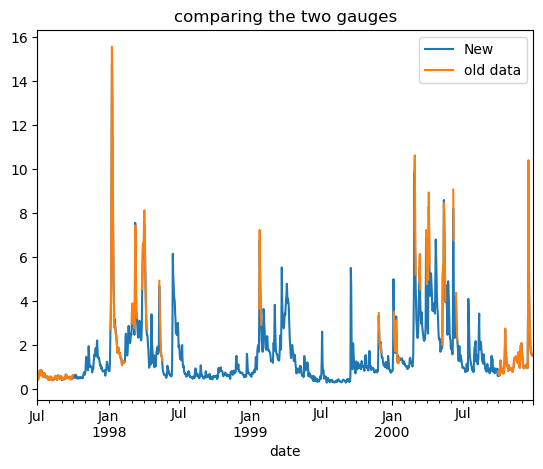

In [166]:
ax = df_combined_E_W["Q"].loc["1997-07":"2000"].plot(label="New")
df["Q"].loc["1997-07":"2000"].plot(ax=ax,label="old data")
ax.legend()
ax.set_title("comparing the two gauges")

In [168]:
# ax = discharge_Q_East["Q"].loc["1980":"2000"].plot(label="East")
# discharge_Q_West["Q"].loc["1980":"2000"].plot(ax=ax,label="west")
# ax.legend()
# ax.set_title("comparing the two gauges")
# ax.set_ylabel("discharge in mm/d")

In [169]:
# df_combined_E_W = pd.DataFrame(pd.concat([discharge_Q_East[["Q"]],discharge_Q_West[["Q"]]],axis=1).dropna().sum(axis=1),columns=["Q"])

In [171]:
# df_combined_E_W["Q"].plot()

Text(0.5, 1.0, 'Comparison of values')

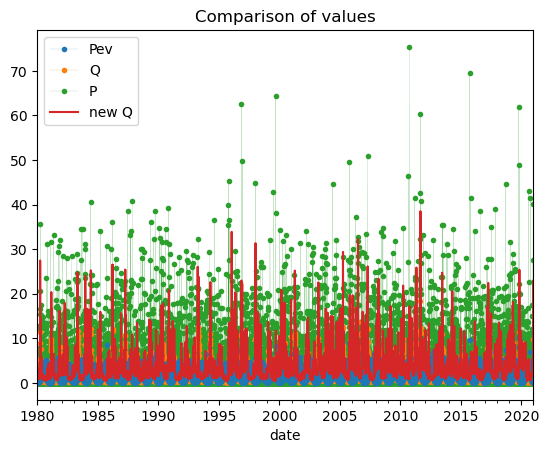

In [172]:
for i, col in enumerate(["Pev","Q","P"]):
    df[col].loc["1980":"2020"].plot(lw=0.1,marker=".",zorder=2-i,label=col)
df_combined_E_W["Q"].loc["1980":"2020"].plot(label="new Q")
plt.legend()
plt.title("Comparison of values")

In [174]:
df_final = pd.concat([temperature,evap,prcp,df_combined_E_W[["Q"]]], axis=1)
df_final.dropna(axis=0)

,T,Pev,P,Q
1980-01-01,-4.244118,0.212411,0.000000,2.769318
1980-01-02,-3.066830,0.167835,0.000000,2.639043
1980-01-03,-6.372549,0.235660,0.023756,2.574587
1980-01-04,-10.202124,0.167202,0.000000,2.413105
1980-01-05,-7.726471,0.192151,0.000000,2.250887
...,...,...,...,...
2020-12-27,-3.492917,0.389499,0.339976,12.906188
2020-12-28,-0.740625,0.698338,0.011413,8.502128
2020-12-29,-2.423333,0.540658,1.005240,6.194972
2020-12-30,-5.392857,0.307142,0.321450,4.780834


In [176]:
df_final.to_parquet(f"{data_folder}\\combined_data.parquet")